### Pacotes

In [3]:
#Importa os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#### Dicionário de Variáveis utilizadas
|Chave|Descrição|
|-----|-----|
|Ano| Ano de referência|
|Trimestre| Trimestre de referência|
|UF| Estado|
|Capital| Capital da UF|
|UPA| Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))|
|V1008| Número do Domicílio|
|Estrato||
|V1014| Painel - Grupo de Amostra|
|V1016| Número de entrevista (1 a 5)|
|V2003| Número de ordem|
|V2007| Sexo|
|V2008| Dia Nascimento|
|V20081| Mês nascimento|
|V20082| Ano nascimento|
|V2010| Raça|
|V4021| Local de trabalho (No Estabelecimento da empresa)|
|V4022| Local de Trabalho (para o caso de não ser no estabelecimento do negócio/empresa)|
|V4041| Código de Ocupação -> cruzar com a tabela COD 2010|
|V4044| Código da Principal atividade da empresa -> cruzar a CNAE-Domicilar|
|V1028| Peso do domicílio e das pessoas sem calibração|
|VD4019| Rendimento mensal habitual de todos os trabalhos para pessoas de 14 anos ou mais de idade|
|VD1029| Projeção da população|

Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082

**PARA ESTIMAÇÃO DOS TOTAIS, DEVE-SE USAR AS VARIÁVEIS: V1033 e posest.**

#### Importação e tratamento dos microdados

Importação dos microdados

In [4]:
#determina qual diretório usar para cada sistema operacional.
import os
if os.name == 'nt': #windows
    diretorio = 'C:\\Users\\est.matheus.brasil\\Documents\\Microdados PNAD Contínua\\'
else: #linux(ou mac)
    diretorio = '/home/matheus/Microdados PNAD/'



#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente.

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', 'V4021', 'V4022', 'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi']

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{diretorio}{ano}_{tri}.csv', usecols=colunas_selecionadas, encoding='utf-8')
        if 2019 < ano < 2022:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{diretorio}{ano}_{tri}.csv', usecols=colunas_selecionadas, encoding='utf-8')
        if ano == 2022 and tri < 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{diretorio}{ano}_{tri}.csv', usecols=colunas_selecionadas, encoding='utf-8')

2019 4
2020 1
2020 2
2020 3
2020 4
2021 1
2021 2
2021 3
2021 4
2022 1
2022 2


In [5]:
#Função para automalizar importação das bases da pnad com as variáveis desejadas

def importa_pnad(path, ano_inicial, ano_final, colunas):
    import traceback
    '''
    path: somente o diretório onde os arquivos estão armazenados.
    ano_inicial: ano inicial do período analisado.
    ano_final: ano final do período analisado.
    '''
    try:    
        for ano in range(ano_inicial, ano_final+1):
            for tri in range(1, 5):
                if ano == 2019  and tri > 3:
                    print(ano, tri)
                    globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{path}{ano}_{tri}.csv', usecols=colunas, encoding='latin-1')
                if 2019 < ano < 2022:
                    print(ano, tri)
                    globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{path}{ano}_{tri}.csv', usecols=colunas, encoding='latin-1')
                if ano == 2022 and tri < 3:
                    print(ano, tri)
                    globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(fr'{path}{ano}_{tri}.csv', usecols=colunas, encoding='latin-1')
        print('Dados importados com sucesso!')
    except Exception:
        traceback.print_exc() #mostra erro em caso de problema na importação

Tratamento

In [6]:
#Conversão das variável V2007(sexo) para inteira para criar ID do indivíduo. (Homem = 0, Mulher = 1)
for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)
        if 2019 < ano < 2022:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)
        if ano == 2022 and tri < 3:
            globals()[f'pnad_{ano}_{tri}']['V2007'] = np.where(globals()[f'pnad_{ano}_{tri}']['V2007'] == 'Homem', 0, 1)


In [7]:
#Organização das variáveis e criação da chave de ID do indivíduo em cada dataframe.

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            globals()[f'pnad_{ano}_{tri}_id_local'] = pd.DataFrame(
                                                        {'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                        'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],
                                                        'UPA':globals()[f'pnad_{ano}_{tri}']['UPA'],
                                                        'UF':globals()[f'pnad_{ano}_{tri}']['UF'],
                                                        'V2007':globals()[f'pnad_{ano}_{tri}']['V2007'],  
                                                        'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                        'V4021': globals()[f'pnad_{ano}_{tri}']['V4021'],
                                                        'V4022': globals()[f'pnad_{ano}_{tri}']['V4022'],
                                                        'V1028': globals()[f'pnad_{ano}_{tri}']['V1028'],
                                                        'V1029': globals()[f'pnad_{ano}_{tri}']['V1029'],
                                                        'V1033': globals()[f'pnad_{ano}_{tri}']['V1033'],
                                                        'posest': globals()[f'pnad_{ano}_{tri}']['posest'],
                                                        'posest_sxi': globals()[f'pnad_{ano}_{tri}']['posest_sxi']
                                                      })
        if 2019 < ano < 2022:
            globals()[f'pnad_{ano}_{tri}_id_local'] = pd.DataFrame(
                                                        {'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                        'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],
                                                        'UPA':globals()[f'pnad_{ano}_{tri}']['UPA'],
                                                        'UF':globals()[f'pnad_{ano}_{tri}']['UF'],
                                                        'V2007':globals()[f'pnad_{ano}_{tri}']['V2007'],  
                                                        'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                        'V4021': globals()[f'pnad_{ano}_{tri}']['V4021'],
                                                        'V4022': globals()[f'pnad_{ano}_{tri}']['V4022'],
                                                        'V1028': globals()[f'pnad_{ano}_{tri}']['V1028'],
                                                        'V1029': globals()[f'pnad_{ano}_{tri}']['V1029'],
                                                        'V1033': globals()[f'pnad_{ano}_{tri}']['V1033'],
                                                        'posest': globals()[f'pnad_{ano}_{tri}']['posest'],
                                                        'posest_sxi': globals()[f'pnad_{ano}_{tri}']['posest_sxi']
                                                      })
        if ano == 2022 and tri < 3:
            globals()[f'pnad_{ano}_{tri}_id_local'] = pd.DataFrame(
                                                        {'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                        'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],
                                                        'UPA':globals()[f'pnad_{ano}_{tri}']['UPA'],
                                                        'UF':globals()[f'pnad_{ano}_{tri}']['UF'],
                                                        'V2007':globals()[f'pnad_{ano}_{tri}']['V2007'],  
                                                        'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V2007'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V2008'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20081'] +
                                                              globals()[f'pnad_{ano}_{tri}']['V20082'],
                                                        'V4021': globals()[f'pnad_{ano}_{tri}']['V4021'],
                                                        'V4022': globals()[f'pnad_{ano}_{tri}']['V4022'],
                                                        'V1028': globals()[f'pnad_{ano}_{tri}']['V1028'],
                                                        'V1029': globals()[f'pnad_{ano}_{tri}']['V1029'],
                                                        'V1033': globals()[f'pnad_{ano}_{tri}']['V1033'],
                                                        'posest': globals()[f'pnad_{ano}_{tri}']['posest'],
                                                        'posest_sxi': globals()[f'pnad_{ano}_{tri}']['posest_sxi']
                                                      })

In [8]:
#Concatena todos os dataframes de cada ano e trimestre em uma unica tabela.

pnadc_completa = pd.concat([pnad_2019_4_id_local, 
                            pnad_2020_1_id_local, 
                            pnad_2020_2_id_local, 
                            pnad_2020_3_id_local, 
                            pnad_2020_4_id_local, 
                            pnad_2021_1_id_local, 
                            pnad_2021_2_id_local, 
                            pnad_2021_3_id_local, 
                            pnad_2021_4_id_local, 
                            pnad_2022_1_id_local, 
                            pnad_2022_2_id_local])

In [29]:
#TODO: Inserir na análise do local de trabalho as pessoas que respoderam sim a questão V4021. Talvez seja necessário criar nova variável a partir da V4021 com a V4022.
pnadc_completa['V4022'].fillna('Em estabelecimento do negócio/empresa', inplace=True)

In [9]:
# Ordernação da série histórica por ano e trimestre.
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)

In [10]:
#concatena a coluna 'Ano' e 'Trimestre' em uma única coluna.
pnadc_completa['ano_tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)

In [11]:
#Conversão da coluna ano_tri para datetime.
pnadc_completa['ano_tri'] = pd.PeriodIndex(pnadc_completa['ano_tri'], freq='Q')

### Análise Exploratória (Expandida)

#### Descritiva Gerais

População total estimada (2T2022)

In [12]:
pop_uf = (pnadc_completa[pnadc_completa['ano_tri']=='2022Q2'].groupby('UF')['V1028'].sum() * \
    pnadc_completa[pnadc_completa['ano_tri']=='2022Q2'].groupby('UF')['V1033'].sum() / \
        pnadc_completa[pnadc_completa['ano_tri']=='2022Q2'].groupby('UF')['V1033'].sum())

pop_uf = pd.DataFrame(index=pop_uf.index, data=pop_uf.values, columns=['População Estimada'])

pop_uf['População Estimada'] = pop_uf['População Estimada'].apply(int)

pop_uf

#TODO: Calcular o desvio padrão da população estimada

,População Estimada
UF,
Acre,900363
Alagoas,3369823
Amapá,882567
Amazonas,4155123
Bahia,15009048
Ceará,9282186
Distrito Federal,3125014
Espírito Santo,4142072
Goiás,7287540


In [13]:
print(f'População estimada para o Brasil(2T2022): {pop_uf["População Estimada"].sum()}')

População estimada para o Brasil(2T2022): 213940082


Quantidade estimada de pessoas do sexo masculino e feminino por UF

In [14]:
pop_sexo_uf = (pnadc_completa[pnadc_completa['ano_tri']=='2022Q2'].groupby(['UF','V2007'])['V1028'].sum() * \
    pnadc_completa[pnadc_completa['ano_tri']=='2022Q2'].groupby(['UF','V2007'])['V1033'].sum() / \
    pnadc_completa[pnadc_completa['ano_tri']=='2022Q2'].groupby(['UF','V2007'])['V1033'].sum())

pop_sexo_uf = pd.DataFrame(index=pop_sexo_uf.index, data=pop_sexo_uf.values, columns=['População Estimada'])

pop_sexo_uf['População Estimada'] = pop_sexo_uf['População Estimada'].apply(int)

pop_sexo_uf = pop_sexo_uf.unstack()

pop_sexo_uf.columns = ['Feminino', 'Masculino']

pop_sexo_uf

,Feminino,Masculino
UF,,
Acre,449006,451356
Alagoas,1619324,1750498
Amapá,448975,433591
Amazonas,2072650,2082472
Bahia,7179435,7829612
Ceará,4503842,4778343
Distrito Federal,1510477,1614536
Espírito Santo,2047016,2095055
Goiás,3608509,3679030


Estimativa do total de pessoas por local de trabalho em todos os trimestres da série.

In [30]:
local_posest_agrupado = pd.crosstab(index=pnadc_completa['ano_tri'],
                                columns=pnadc_completa['V4022'], 
                                values=pnadc_completa['posest'], 
                                aggfunc='sum')

local_peso_agrupado = pd.crosstab(index=pnadc_completa['ano_tri'],
                                columns=pnadc_completa['V4022'], 
                                values=pnadc_completa['V1029'], 
                                aggfunc='sum')

local_trabalho_expandido = (local_posest_agrupado * local_peso_agrupado) / local_peso_agrupado                                

Total de pessoas por local local de trabalho em cada trimestre

In [16]:
pd.crosstab(index=pnadc_completa['ano_tri'],
                             columns=pnadc_completa['V4022'], values=(pnadc_completa['V1029']*pnadc_completa['posest'])/pnadc_completa['V1029'], aggfunc='sum')

V4022,"Em domicílio de empregador, patrão, sócio ou freguês",Em estabelecimento de outro négocio/empresa,"Em local designado pelo empregador, cliente ou freguês","Em outro local, especifique","Em veículo automotor (táxi, ônibus, caminhão, automóvel, embarcação, etc.)","Em via ou área pública (rua, rio, manguezal, mata pública, praça, praia etc.)","No domicílio de residência, em local exclusivo para o desempenho da atividade","No domicílio de residência, sem local exclusivo para o desempenho da atividade"
ano_tri,,,,,,,,
2019Q4,551165.0,872294.0,8314275.0,132746.0,2733870.0,1616684.0,1401940.0,1995927.0
2020Q1,429022.0,735621.0,7129620.0,110726.0,2482356.0,1420222.0,1256501.0,1780975.0
2020Q2,269039.0,565425.0,4717074.0,72425.0,1730357.0,807846.0,978294.0,1266258.0
2020Q3,274355.0,539021.0,4761211.0,85829.0,1584083.0,776977.0,1028754.0,1329210.0
2020Q4,276152.0,494578.0,4519339.0,83641.0,1516191.0,793143.0,1090419.0,1355368.0
2021Q1,261902.0,431484.0,4293998.0,74133.0,1407660.0,754611.0,1092998.0,1352015.0
2021Q2,313379.0,468991.0,4863340.0,90984.0,1566155.0,921672.0,1308249.0,1538922.0
2021Q3,416776.0,575540.0,6203848.0,127151.0,1962686.0,1192100.0,1614447.0,1919838.0
2021Q4,444946.0,620744.0,6762799.0,151675.0,2063158.0,1286129.0,1742474.0,2052621.0


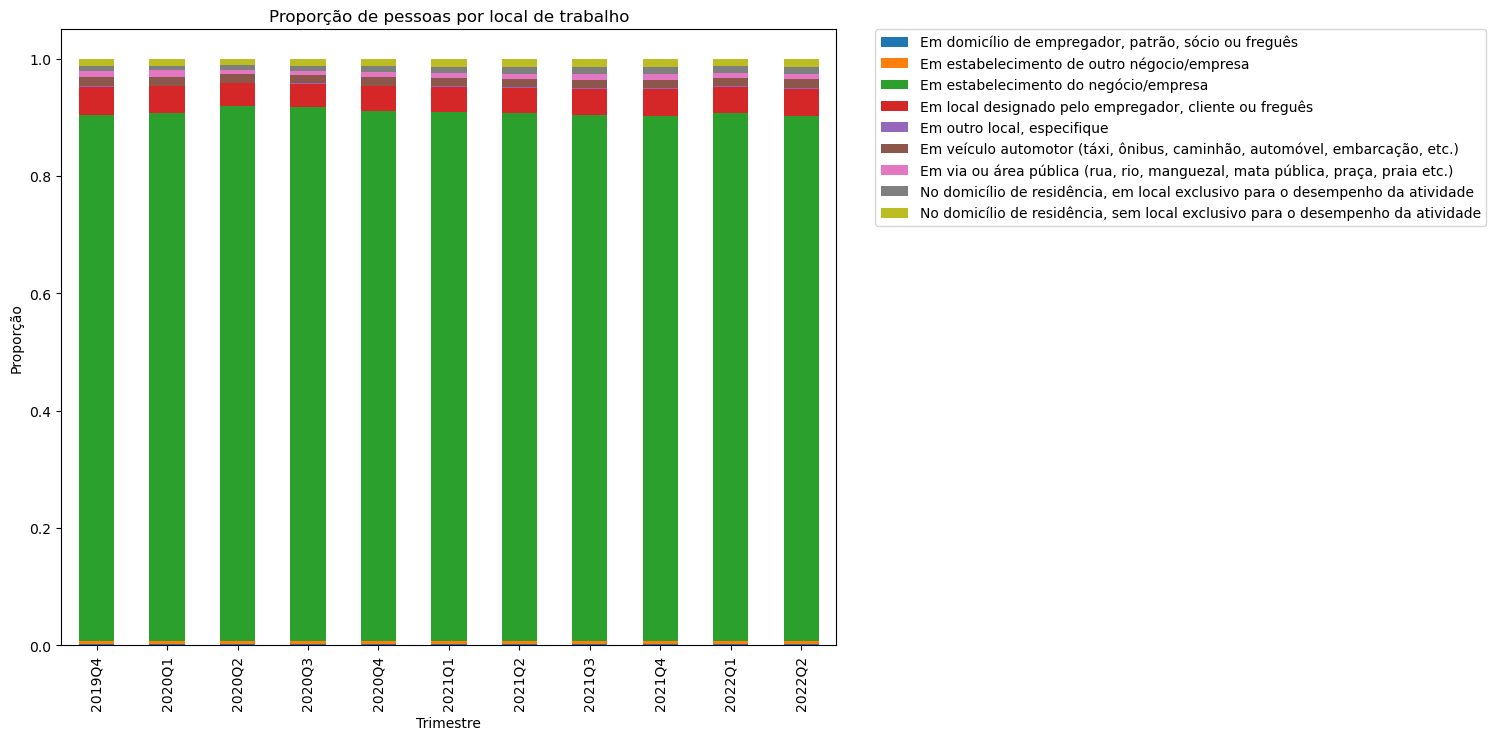

In [32]:
cross_tab_prop = pd.crosstab(index=pnadc_completa['ano_tri'],
                             columns=pnadc_completa['V4022'],
                             normalize="index")


cross_tab_prop.plot(kind='bar', stacked=True, figsize=(10, 8), title='Proporção de pessoas por local de trabalho')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Trimestre')
plt.ylabel('Proporção')

plt.show()

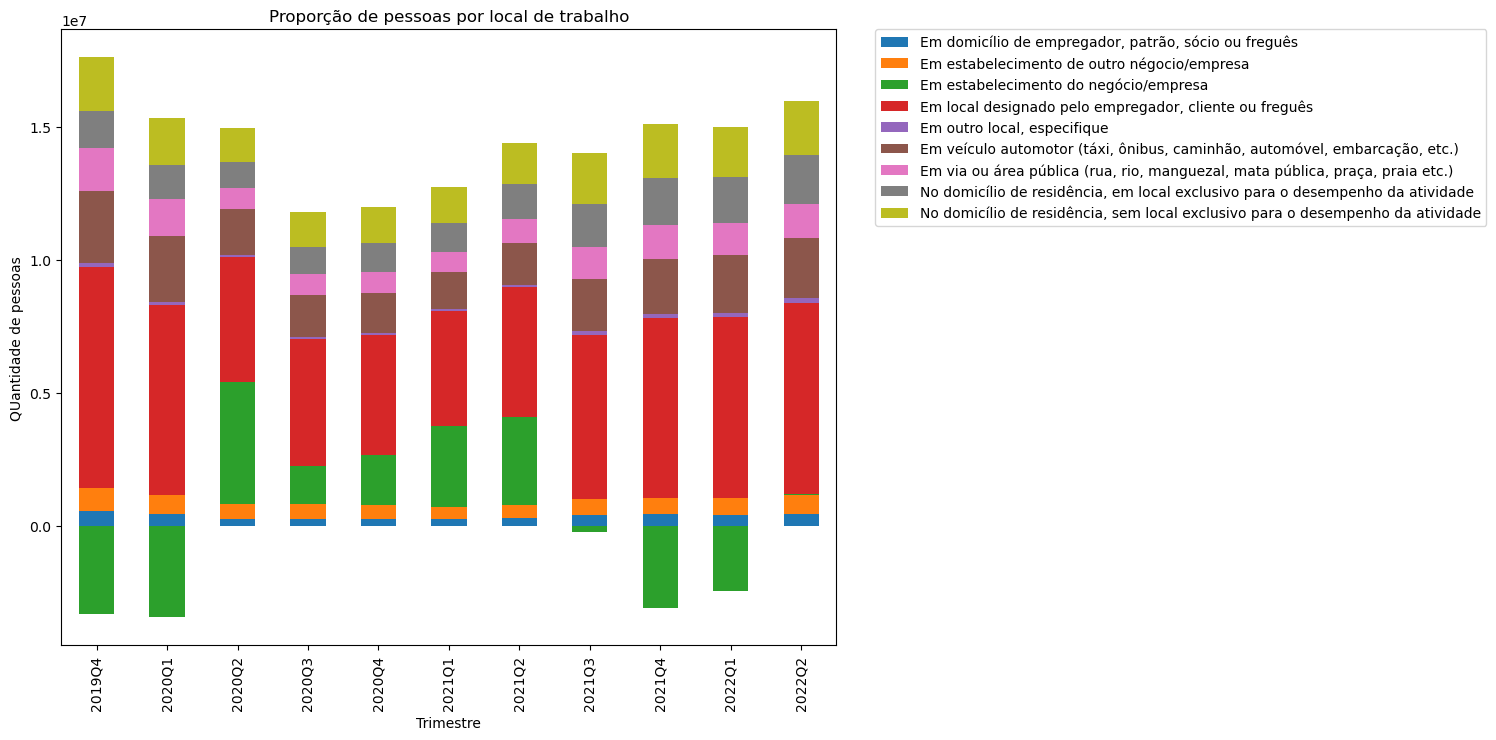

In [33]:
local_trabalho_expandido.plot(kind='bar', stacked=True, figsize=(10, 8), title='Proporção de pessoas por local de trabalho')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Trimestre')
plt.ylabel('QUantidade de pessoas')

plt.show()

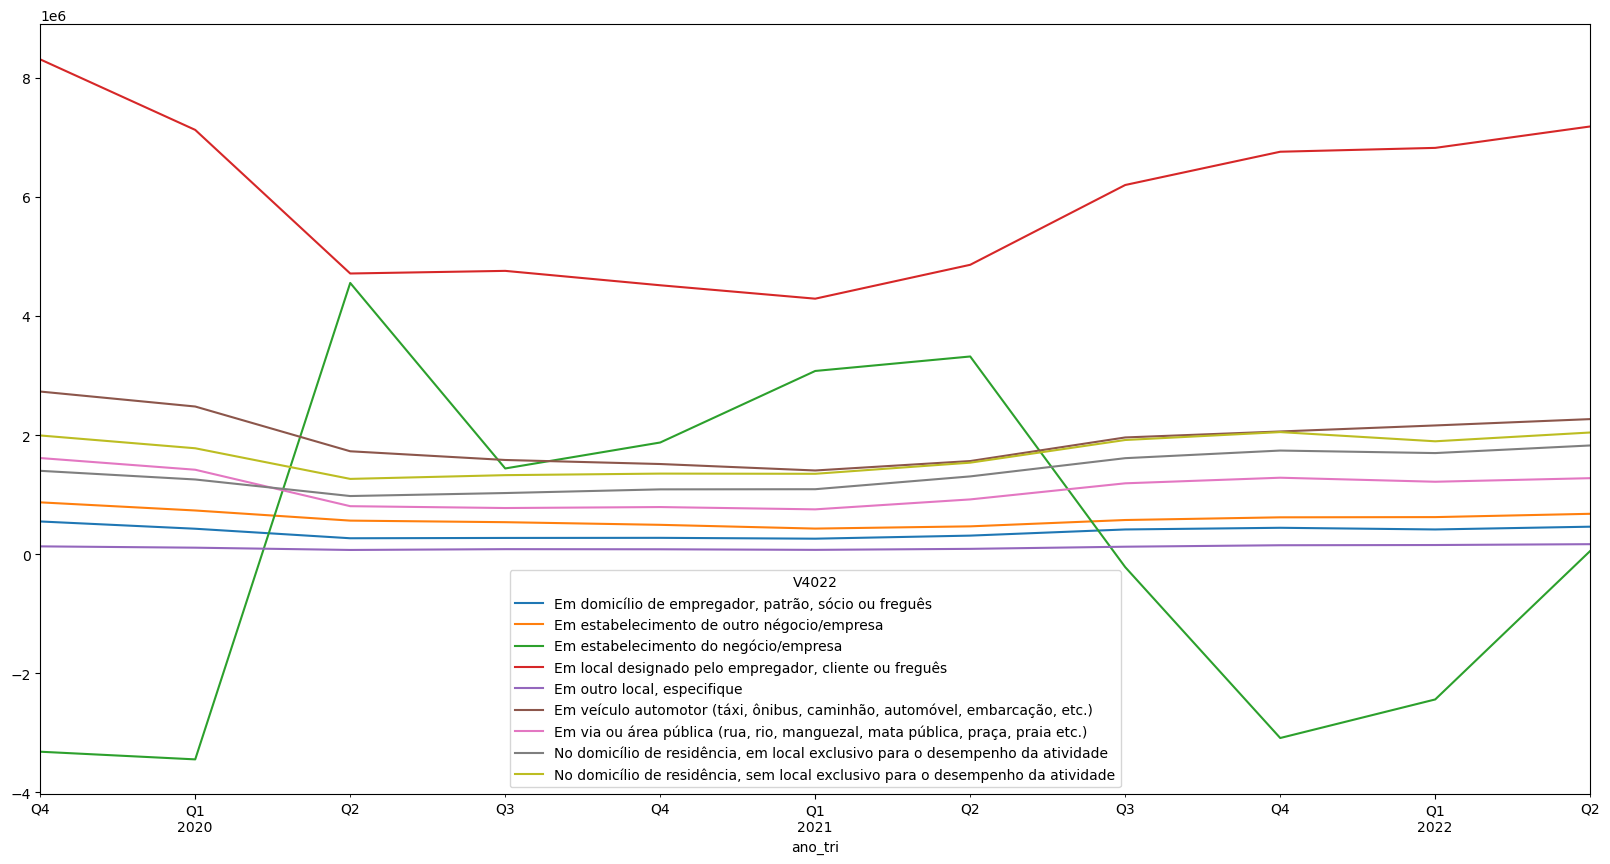

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))
local_trabalho_expandido.plot(ax=ax)
plt.show()

In [20]:
#Função para estimar média agrupada por alguma coluna

def weighted_average(df,data_col,weight_col,by_col):
    df['_data_times_weight'] = df[data_col]*df[weight_col]
    df['_weight_where_notnull'] = df[weight_col]*pd.notnull(df[data_col])
    g = df.groupby(by_col)
    result = g['_data_times_weight'].sum() / g['_weight_where_notnull'].sum()
    del df['_data_times_weight'], df['_weight_where_notnull']
    return result